<a href="https://colab.research.google.com/github/HiroTakeda/Notes/blob/main/Note06_SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine

Related topics: __Logistic Regression__

Suppot Vector Machine (SVM) is a binary classifier. It's well studied, but it is not as popular as before because the neural network approaches have come under the spotlight. However, it is easy to understand and implement and still a good choice for a simple classification problem. This short note briefly explains SVM.

![picture](https://drive.google.com/uc?id=1ZLaeyaSBnbBZ7IQCcXJBIzi9x5DPx1-q)


### Optimization

SVM is a binary classifier. When samples are given as shown in the figure above, we might think of finding a line, $g(\mathbf{x})=0$, between two classes with a margin $M$ between the classes as large as possible.

In the case the given samples are perfectly separable, we only need 3 samples (for example 2 positive samples and 1 negative sample or 1 positive sample and 2 negative samples) to determine the line $g(\mathbf{x})=0$ (Note: it becomes a hyper plane for the multidimensional data). Those samples are called __support vectors__.

If we want a binary classifier $g(\mathbf{x}) \ge +1$ for positive samples and $g(\mathbf{x}) \le -1$ for negative samples, the magine $M$ can be expressed as follows:

$$
M = \| \mathbf{x}^{+} - \mathbf{x}^{-} \|_2,
$$

where $\mathbf{x}^{+}$ and $\mathbf{x}^{-}$ are a pair of the closest points on $g(\mathbf{x})=+1$ and $g(\mathbf{x})=-1$, respectively. If we express the line equation $g(\mathbf{x})$ as

$$
g(\mathbf{x}) = \omega_1 x_1 + \omega_2 x_2 + \cdots + b = \boldsymbol{\omega} \cdot \mathbf{x} + b,
$$

then we have

$$
\begin{eqnarray}
g(\mathbf{x}^{+}) = \boldsymbol{\omega} \cdot \mathbf{x}^{+} + b &=& 1, \nonumber \\
g(\mathbf{x}^{-}) = \boldsymbol{\omega} \cdot \mathbf{x}^{-} + b &=& -1, \nonumber
\end{eqnarray}
$$

and with a scalar value $r$

$$
\mathbf{x}^{+}-\mathbf{x}^{-} = r \, \boldsymbol{\omega},
$$

because the vector $\mathbf{x}^{+}-\mathbf{x}^{-}$ is perpendicular to the line $g(\mathbf{x})=0$. The above two equetions yield $r$ as

$$
\begin{eqnarray}
\boldsymbol{\omega} \cdot \mathbf{x}^{+} + b &=& 1 \nonumber \\
\boldsymbol{\omega} \cdot (\mathbf{x}^{-} + r \, \boldsymbol{\omega}) + b &=& 1 \nonumber \\
r \, \boldsymbol{\omega} \cdot \boldsymbol{\omega} + \boldsymbol{\omega} \cdot \mathbf{x}^{-} + b &=& 1 \nonumber \\
r \, \boldsymbol{\omega} \cdot \boldsymbol{\omega} + (-1) &=& 1 \nonumber \\
r = \displaystyle\frac{2}{\boldsymbol{\omega} \cdot \boldsymbol{\omega}} &=& \displaystyle\frac{2}{\|\boldsymbol{\omega}\|_2^2}.
\end{eqnarray}
$$

It yields the margin $M$ as

$$
M = \| \mathbf{x}^{+} - \mathbf{x}^{-} \|_2 = r \| \boldsymbol{\omega} \|_2 = \displaystyle\frac{2}{\| \boldsymbol{\omega} \|_2^2} \| \boldsymbol{\omega} \|_2 = \displaystyle\frac{2}{\| \boldsymbol{\omega} \|_2} = \displaystyle\frac{2}{ \sqrt{\boldsymbol{\omega} \cdot \boldsymbol{\omega} }}.
$$

Therefore we have the following optimization problem to find the line $g(\mathbf{x})$:

$$
\displaystyle\max_{\boldsymbol{\omega}} \displaystyle\frac{2}{\| \boldsymbol{w} \|_2}
$$

such that

$$
\begin{eqnarray}
g(\mathbf{x}) &=& \boldsymbol{\omega} \cdot \mathbf{x} + b \ge +1 \quad \mathrm{for\ positive\ samples} \nonumber \\
g(\mathbf{x}) &=& \boldsymbol{\omega} \cdot \mathbf{x} + b \le -1 \quad \mathrm{for\ negative\ samples}. \nonumber
\end{eqnarray}
$$

Again, in the perfectly separable case, we only need 3 samples (2 positive + 1 negative or 1 positive + 2 negative). But we do not want to manually select those 3 samples. Followings explain how we can find $g(\mathbf{x})$ automatically.

### Hinge Loss

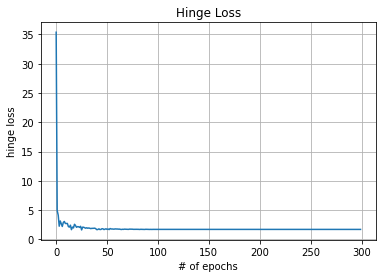

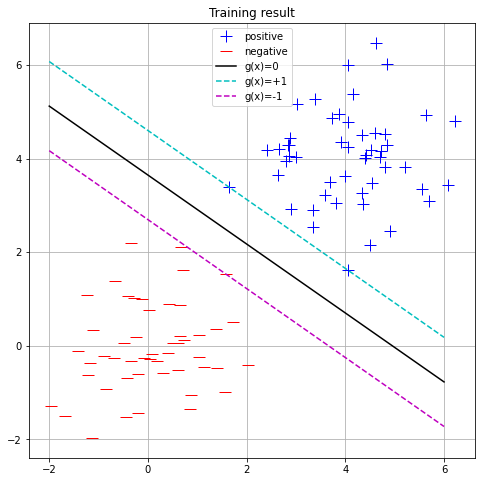

In [ ]:
import numpy
import pylab

numpy.random.seed(4)

N = 100 # number of samples
nu = numpy.array([1, 1, 0]) * 1e-5
eta = 0.1
num_epochs = 300

# create training samples
x_positive = numpy.random.randn(2, N//2) + 4
x_negative = numpy.random.randn(2, N - N//2)
t_positive = numpy.ones(N//2)
t_negative = numpy.ones(N - N//2) * (-1)
x = numpy.hstack((x_positive, x_negative))
t = numpy.hstack((t_positive, t_negative))

# weights
w = numpy.ones((3,)) # includes the bias term

# stochastic gradient descent
losses = []
indices = numpy.arange(N)
for _ in range(num_epochs):
  loss = 0
  indices = numpy.random.permutation(indices)
  for i in indices:
    xi = numpy.hstack((x[:,i], 1)) # attach 1 for the bias term
    # calculate the gradient
    if t[i] * numpy.sum(w * xi) < 1.0:
      # use only the samples inside the margin
      d = nu * w - t[i] * xi
      # calculate the hinge loss only for plot
      loss += 1 - t[i] * numpy.sum(w * xi)
    else:
      d = nu * w
    
    # update
    w -= eta * d

  # save the hinge loss for plot
  loss += numpy.sum(w[:-1] * w[:-1])
  losses.append(loss)

  # update the step size
  eta *= 0.95

# plot the hinge loss curve
x0 = numpy.linspace(-2, 6, 10)
x1 = -((w[0]) * x0 + w[2]) / w[1] 
pylab.plot(losses)
pylab.title('Hinge Loss')
pylab.xlabel('# of epochs')
pylab.ylabel('hinge loss')
pylab.grid()
pylab.show()

# plot the result
pylab.figure(figsize=(8,8))
pylab.plot(x_positive[0,:], x_positive[1,:], 'b+', label='positive', ms=12)
pylab.plot(x_negative[0,:], x_negative[1,:], 'r_', label='negative', ms=12)
pylab.plot(x0, x1, 'k-', label='g(x)=0')
pylab.plot(x0, x1 + 1/w[1], 'c--', label='g(x)=+1')
pylab.plot(x0, x1 - 1/w[1], 'm--', label='g(x)=-1')
pylab.title('Training result')
pylab.legend()
pylab.grid()
pylab.show()


